In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import matplotlib.pyplot as plt





In [10]:
file_path = '/content/drive/MyDrive/ds/Sleep_health_and_lifestyle_dataset.csv'

try:
    # Load data
    df = pd.read_csv(file_path)
    print(f"Successfully loaded data from {file_path}")
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please double-check the path.")
except Exception as e:
    print(f"An error occurred while loading the file: {e}")

Successfully loaded data from /content/drive/MyDrive/ds/Sleep_health_and_lifestyle_dataset.csv


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nBasic statistics:\n{df.describe()}")

Dataset shape: (374, 13)

Columns: ['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']

Data types:
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

Missing values:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Categor

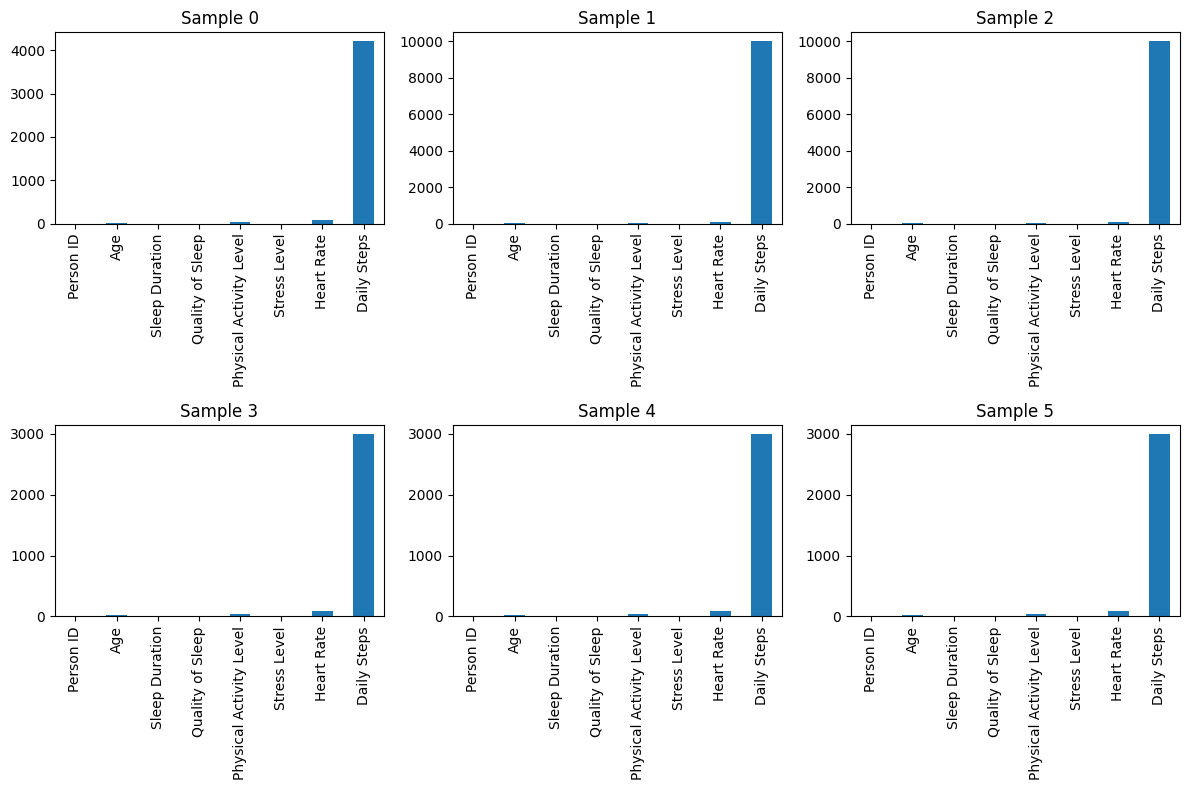

In [14]:
# Visualize sample data
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    if i < len(df):
        # Adjust based on your data type
        if 'image' in df.columns:  # For image data
            ax.imshow(df['image'].iloc[i])
        else:  # For tabular data, plot only numeric columns
            # First select numeric columns from the DataFrame, then the row
            df.select_dtypes(include=['number']).iloc[i].plot(kind='bar', ax=ax)
        ax.set_title(f"Sample {i}")
plt.tight_layout()
plt.show()

### Correlation of 'Stress Level' with other numerical features

Let's examine the correlation between 'Stress Level' and all other numerical columns to identify potential relationships.

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate correlation of 'Stress Level' with other numeric columns
correlation_with_stress = df[numeric_cols].corr()['Stress Level'].drop('Stress Level')

print("Correlation of 'Stress Level' with other numerical columns:")
display(correlation_with_stress.sort_values(ascending=False))

### Exploring 'Stress Level' as a target variable

Let's start by examining the distribution of 'Stress Level' in the dataset.

In [15]:
print("Unique values in 'Stress Level' and their counts:")
display(df['Stress Level'].value_counts().sort_index())

Unique values in 'Stress Level' and their counts:


,count
Stress Level,
3,71
4,70
5,67
6,46
7,50
8,70
